In [8]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
# from haloclustering.data import get_combined_dataset
from scipy.stats import binned_statistic
from haloclustering import models
from haloclustering import data as datamodule
from haloclustering.plot import CovFracPlot
from casbah import cgm
import matplotlib
matplotlib.rcParams['font.serif'] = "DejaVu Serif"
matplotlib.rcParams['font.family'] = "serif"

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 16
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### read in data

In [9]:
cgmsqfile = "/Users/mwilde/python/cgm-squared/cgmsquared/data/cgm/cgmsquared_cgmsurvey_aodm_vhalos10_3sigma.json"
casdir = "/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_*.fits"
data_lo = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=7, M_max=9.204)
data_mid = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.204, M_max=9.888)
data_hi = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.888, M_max=17.)
data = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=7, M_max=17)


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 441
misses 1616
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 85
misses 102
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 520
misses 2096
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 92
misses 93
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 428
misses 1797
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 91
misses 96
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cu

In [10]:
# instantiate the model
model = models.Model2h(data=data)
# read in the params from the sampler
two_halo_Xmpc_sampler_file = '/Users/mwilde/python/haloclustering/haloclustering/notebooks/two-halo-only/model_2h_only_2Mpc_sampler.pkl'
sampler = datamodule.get_sampler_pickle_file(two_halo_Xmpc_sampler_file)

# all masses

the uncertainty here is the intrabin spread
* TODO: add 1-halo, 2-aho model to these plots
* ~~TODO: check rho_min comoving~~
* TODO: plot fraction of time no crossing of R21 as mass 
* ~~TODO: mark uncertainty on the model by sampling from the parameters~~

* TODO: try fill_between
* ~~TODO: add a beta_2h term to the 2h only model - detect mass dep. at large radii??~~
* ~~TODO: try fit to >2Mpc vs 5Mpc  vs 10Mpc~~



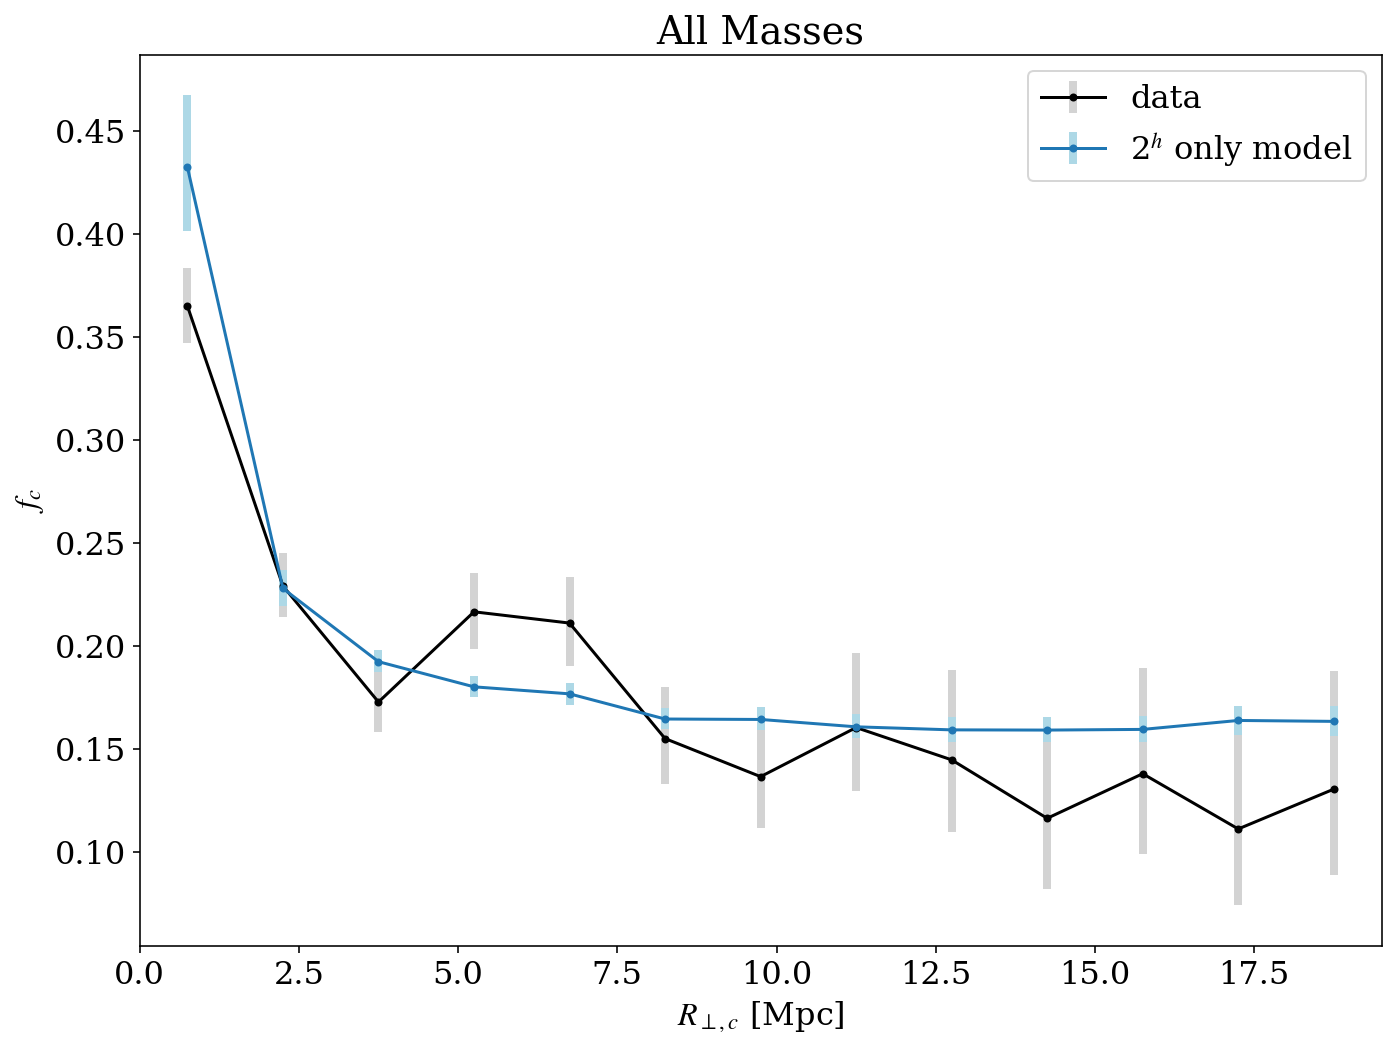

In [11]:
plot = CovFracPlot(data, model, sampler)
plot.savefile = "plot_fc_2halo_all_mass_2Mpc.pdf"
plot.title = "All Masses"
plot.label = r"2$^h$ only model"
bins = np.arange(0, 20, 1.5)
plot.plot_fc_rho(bins=bins)

# hi mass

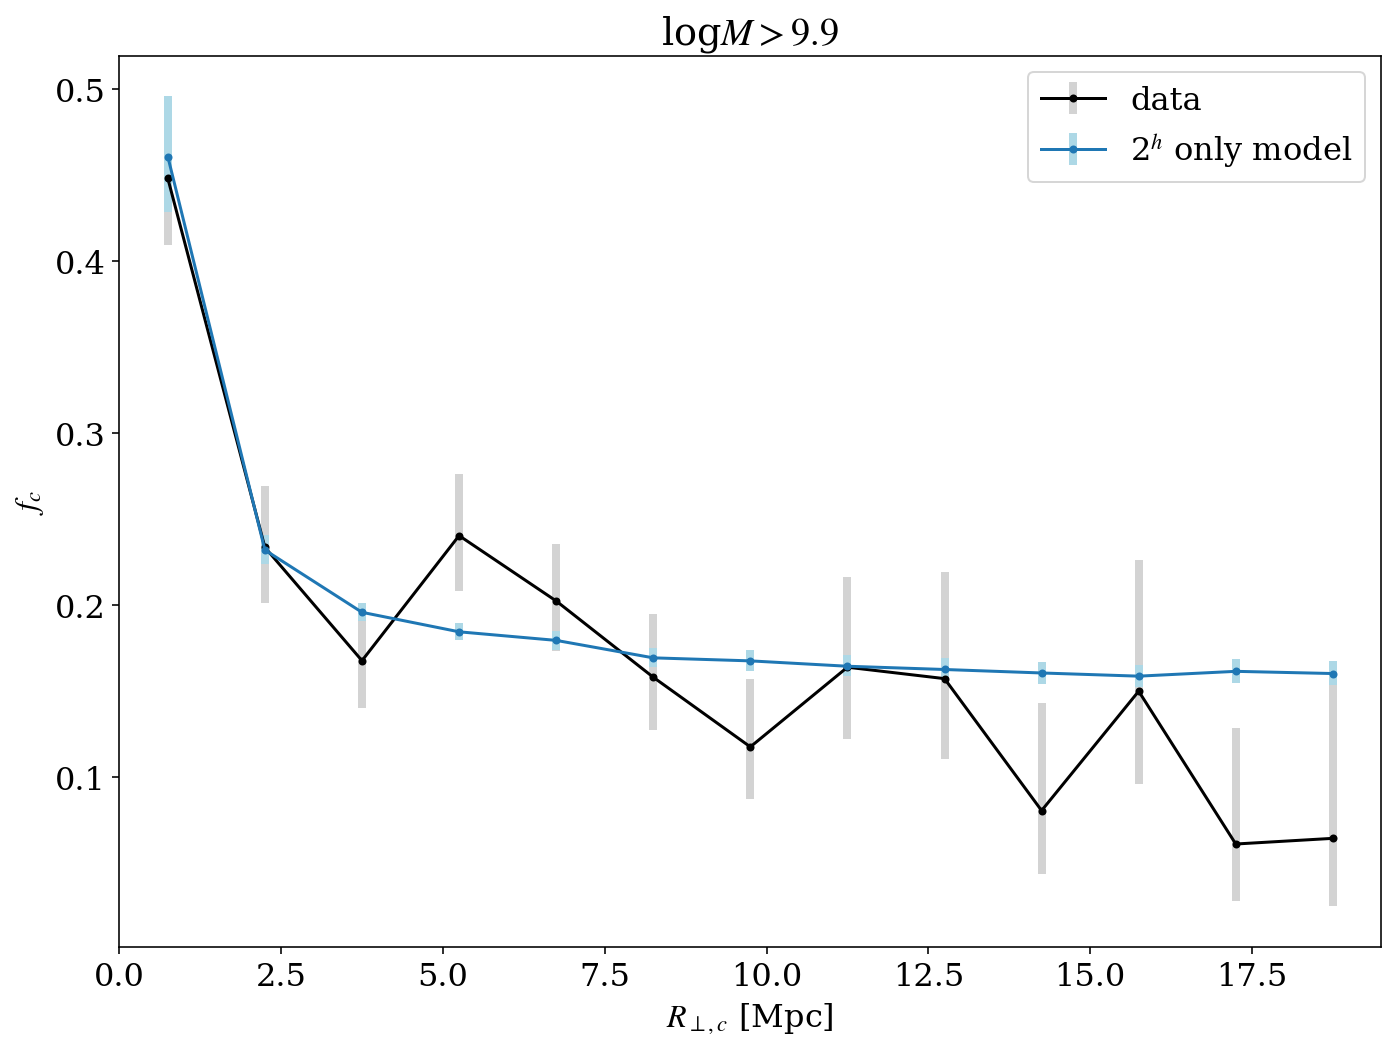

In [12]:
model = models.Model2h(data=data_hi)
plot = CovFracPlot(data_hi, model, sampler)
plot.savefile = "plot_fc_2halo_hi_mass_2Mpc.pdf"
plot.title = r"log$M > 9.9$"
plot.label = r"2$^h$ only model"
plot.plot_fc_rho(bins=bins)



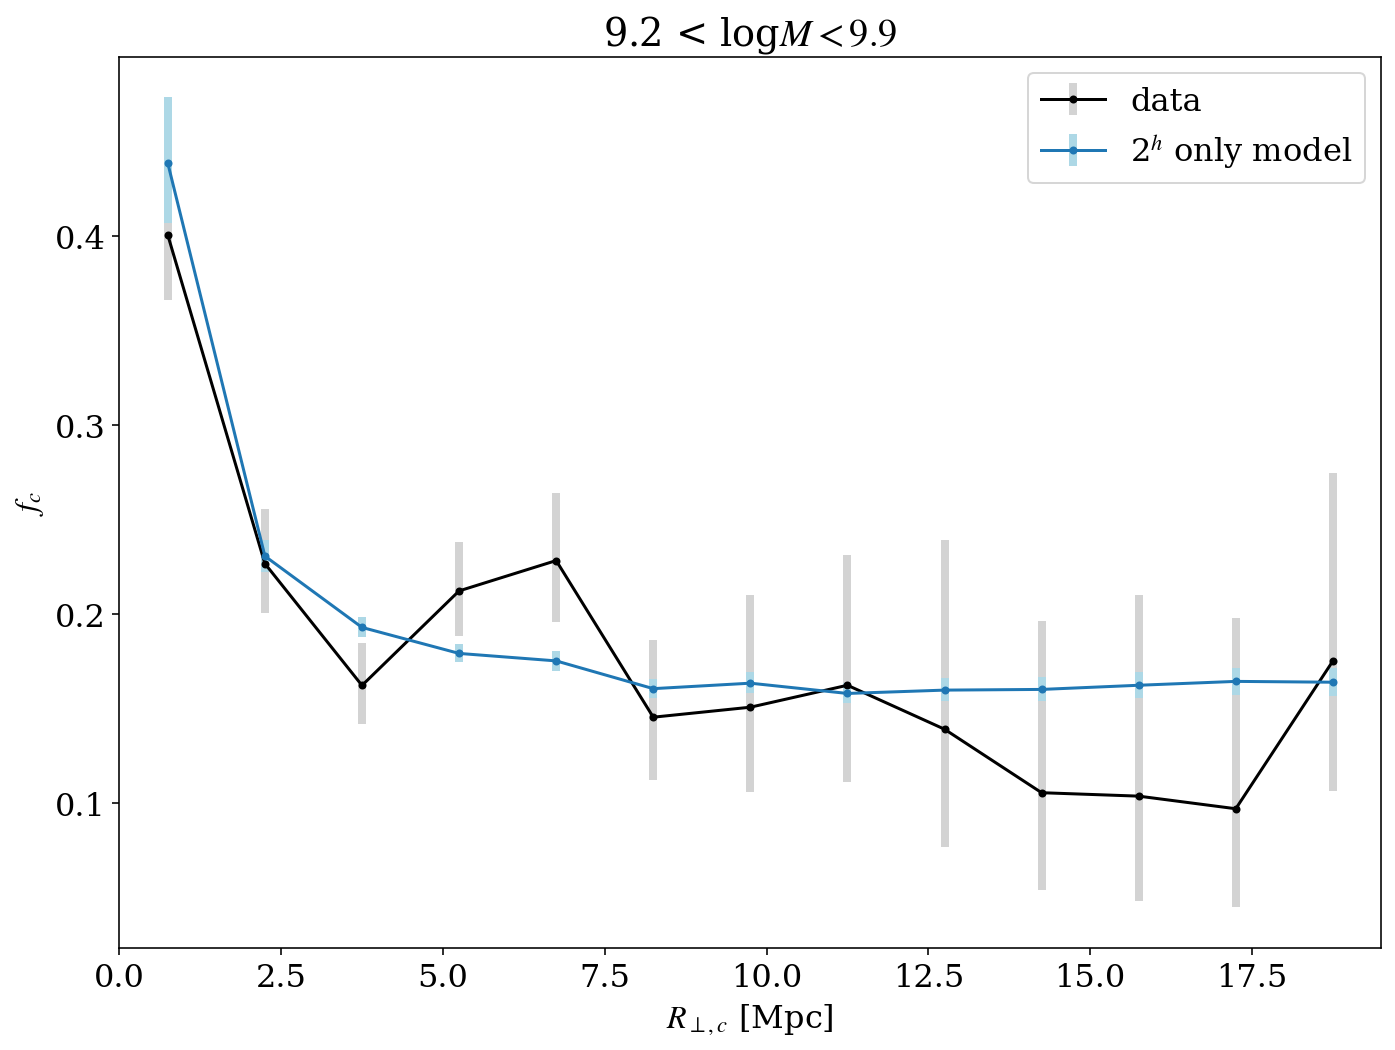

In [13]:
model = models.Model2h(data=data_mid)
plot = CovFracPlot(data_mid, model, sampler)
plot.savefile = "plot_fc_2halo_mid_mass_2Mpc.pdf"
plot.title = r"9.2 < log$M < 9.9$"
plot.label = r"2$^h$ only model"
plot.plot_fc_rho(bins=bins)

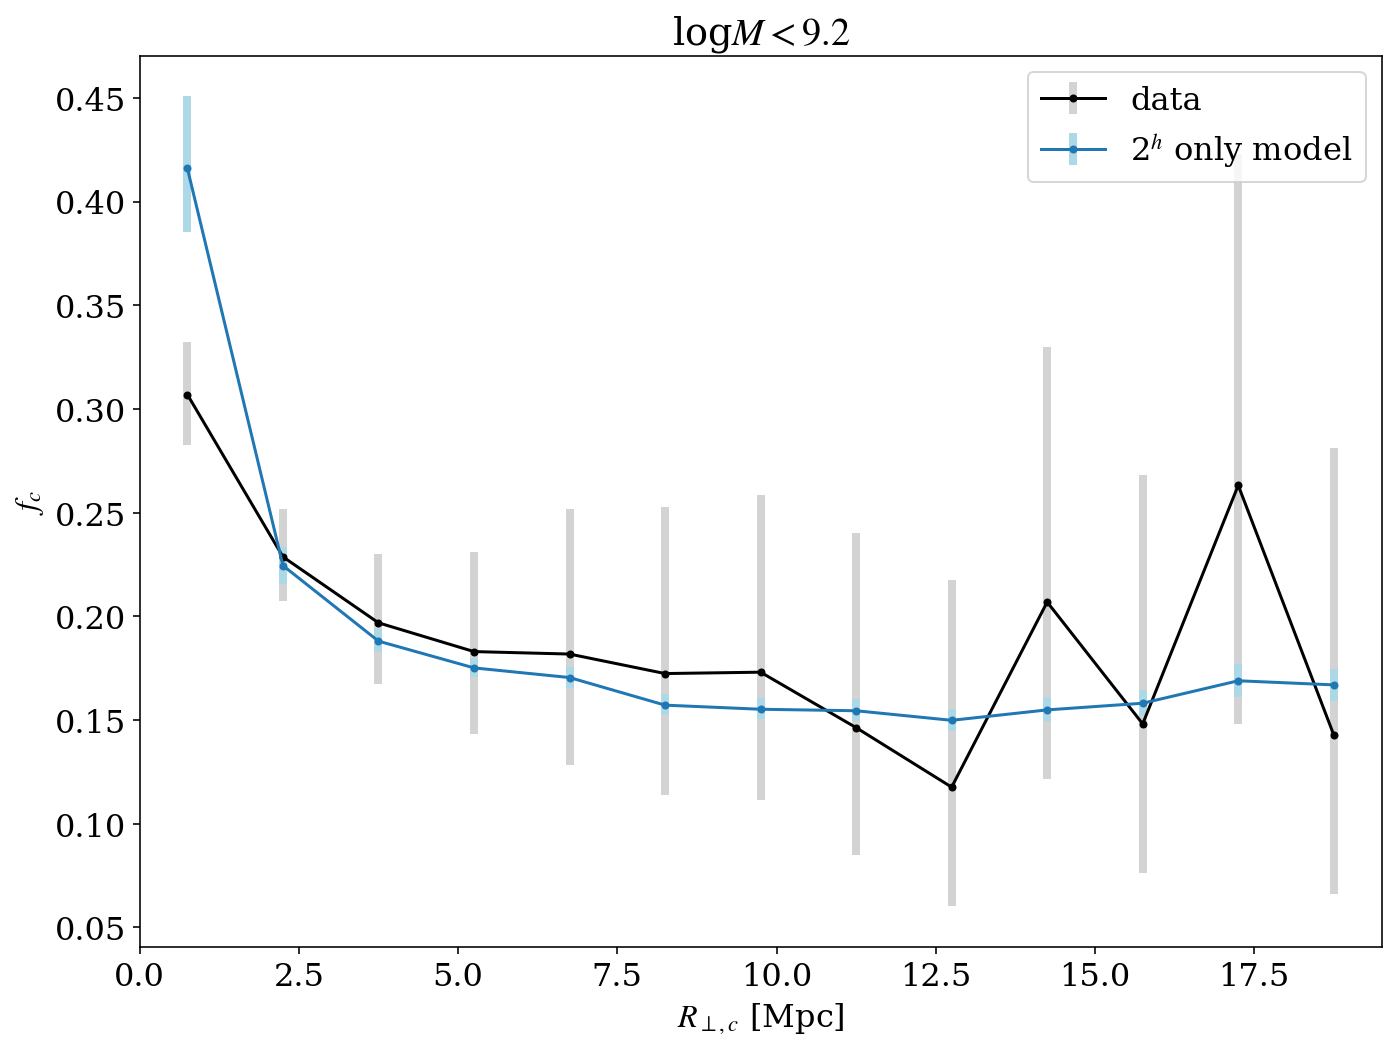

In [14]:
model = models.Model2h(data=data_lo)
plot = CovFracPlot(data_lo, model, sampler)
plot.savefile = "plot_fc_2halo_lo_mass_2Mpc.pdf"
plot.title = r"log$M < 9.2$"
plot.label = r"2$^h$ only model"
plot.plot_fc_rho(bins=bins)